# Problem statement:
This dataset has total 21 columns and 740 rows. Our task is to analyze the dataset and predict the expected Absenteeism hrs  by developing a Regression model.

In [81]:
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import RFE



In [52]:
df = pd.read_excel('Absenteeism_at_work.xlsx')
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


# Analyzing the data:
Let’s start analyzing the data provided. We need to know the number of columns, rows, null objects, etc. So, let’s open the data and start counting the columns, get the row count, go through each row to find out any special characters or null values in it, find out the data type of each column provided.

In [53]:
df.shape

(740, 21)

In [54]:
df.corr()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,1.000000,-0.064245,-0.000043,0.034468,0.098495,-0.224163,-0.486160,-0.272704,0.040899,0.092457,...,0.004502,-0.036254,0.002767,-0.451338,-0.010826,-0.041418,-0.254222,0.076363,-0.306924,-0.017997
Reason for absence,-0.064245,1.000000,-0.083858,0.116319,-0.117925,-0.119381,0.161831,0.048425,-0.078608,-0.123472,...,-0.545054,-0.047357,-0.055364,0.065441,-0.115702,-0.055911,-0.000269,-0.079267,0.037205,-0.173116
Month of absence,-0.000043,-0.083858,1.000000,-0.006528,0.407770,0.137525,-0.003887,-0.062862,-0.001520,-0.169989,...,0.107946,-0.066128,0.079031,0.056226,-0.038603,0.047787,0.023278,-0.068942,0.051046,0.024345
Day of the week,0.034468,0.116319,-0.006528,1.000000,0.046493,0.033988,0.118026,0.021252,0.004459,0.015646,...,-0.015120,0.058516,0.098079,0.041772,0.013156,-0.028885,-0.128980,-0.082133,-0.103578,-0.124361
Seasons,0.098495,-0.117925,0.407770,0.046493,1.000000,0.036995,-0.063108,-0.010904,-0.012089,0.150439,...,0.151766,-0.002951,0.046950,-0.045982,-0.048671,0.012356,-0.026278,-0.033737,-0.011031,-0.005615
Transportation expense,-0.224163,-0.119381,0.137525,0.033988,0.036995,1.000000,0.262183,-0.349887,-0.227542,0.005438,...,0.109222,-0.055065,0.383001,0.145117,0.044356,0.400080,-0.207435,-0.194496,-0.136517,0.027585
Distance from Residence to Work,-0.486160,0.161831,-0.003887,0.118026,-0.063108,0.262183,1.000000,0.131730,-0.145886,-0.068677,...,-0.056527,-0.259605,0.054230,0.452196,-0.075369,0.205941,-0.047859,-0.353372,0.113772,-0.088363
Service time,-0.272704,0.048425,-0.062862,0.021252,-0.010904,-0.349887,0.131730,1.000000,0.670979,-0.000668,...,-0.000221,-0.213000,-0.047128,0.353141,0.072424,-0.440301,0.455975,-0.053135,0.499718,0.019029
Age,0.040899,-0.078608,-0.001520,0.004459,-0.012089,-0.227542,-0.145886,0.670979,1.000000,-0.039425,...,0.104304,-0.221882,0.056984,0.213183,0.121738,-0.231226,0.418730,-0.062997,0.470688,0.065760
Work load Average/day,0.092457,-0.123472,-0.169989,0.015646,0.150439,0.005438,-0.068677,-0.000668,-0.039425,1.000000,...,0.029026,-0.074960,0.027820,-0.033713,0.030968,0.007114,-0.038522,0.103315,-0.090709,0.024749


# Feature Engineering:
Machine Learning model requires input data in numerical notations to extract patterns from it and make predictions. But, not all the data provided in our source dataset is numerical. the data provided in object column is Categorical data. we need to convert these into numerical notations. Here data is nothing but a feature that our model uses as an input. So, we perform Feature Engineering on our data to create meaningful numerical data out of the source dataset.

In [55]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [56]:
df.dtypes

ID                                 int64
Reason for absence                 int64
Month of absence                   int64
Day of the week                    int64
Seasons                            int64
Transportation expense             int64
Distance from Residence to Work    int64
Service time                       int64
Age                                int64
Work load Average/day              int64
Hit target                         int64
Disciplinary failure               int64
Education                          int64
Son                                int64
Social drinker                     int64
Social smoker                      int64
Pet                                int64
Weight                             int64
Height                             int64
Body mass index                    int64
Absenteeism time in hours          int64
dtype: object

In [57]:
df.drop(['ID'],axis=1,inplace=True)

In [58]:
df.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2


In [59]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

Reason for absence : [26  0 23  7 22 19  1 11 14 21 10 13 28 18 25 24  6 27 17  8 12  5  9 15
  4  3  2 16]
Month of absence : [ 7  8  9 10 11 12  1  2  3  4  5  6  0]
Day of the week : [3 4 5 6 2]
Seasons : [1 4 2 3]
Transportation expense : [289 118 179 279 361 260 155 235 246 189 248 330 157 291 184 225 369 388
 378 228 300 268 231 233]
Distance from Residence to Work : [36 13 51  5 52 50 12 11 25 29 16 27 42 10 20 31 26 17 22 15 49 48 14 35
 45]
Service time : [13 18 14  3 11 16  4  6 12  7 10  9 17 29  8  1 15 24]
Age : [33 50 38 39 28 36 34 37 41 47 29 48 32 27 43 40 31 30 49 58 46 53]
Work load Average/day  : [239554 205917 241476 253465 306345 261306 308593 302585 343253 326452
 378884 377550 275312 265615 294217 265017 284031 236629 330061 251818
 244387 239409 246074 253957 230290 249797 261756 284853 268519 280549
 313532 264249 222196 246288 237656 275089 264604 271219]
Hit target : [ 97  92  93  95  99  96  94  98  81  88 100  87  91]
Disciplinary failure : [0 1]
Education

In [60]:
categorical_val

['Day of the week',
 'Seasons',
 'Disciplinary failure',
 'Education',
 'Son',
 'Social drinker',
 'Social smoker',
 'Pet']

In [61]:
data = pd.get_dummies(df, columns = categorical_val)
data.head()

,Reason for absence,Month of absence,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Weight,Height,...,Social drinker_0,Social drinker_1,Social smoker_0,Social smoker_1,Pet_0,Pet_1,Pet_2,Pet_4,Pet_5,Pet_8
0,26,7,289,36,13,33,239554,97,90,172,...,0,1,1,0,0,1,0,0,0,0
1,0,7,118,13,18,50,239554,97,98,178,...,0,1,1,0,1,0,0,0,0,0
2,23,7,179,51,18,38,239554,97,89,170,...,0,1,1,0,1,0,0,0,0,0
3,7,7,279,5,14,39,239554,97,68,168,...,0,1,0,1,1,0,0,0,0,0
4,23,7,289,36,13,33,239554,97,90,172,...,0,1,1,0,0,1,0,0,0,0


In [62]:
df = pd.concat((df,data),axis=1)

# Data Visualization:
Here we would try to find out a relation between each column of the final numerical dataset and the target attribute income. This can be achieved by creating a Bar graph between income and each of the other columns.

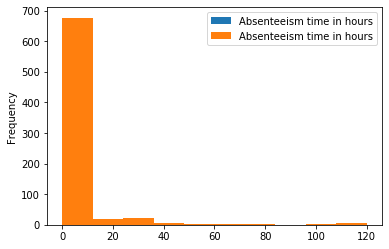

In [63]:
#Check skewness of data set
df['Absenteeism time in hours'].plot.hist()

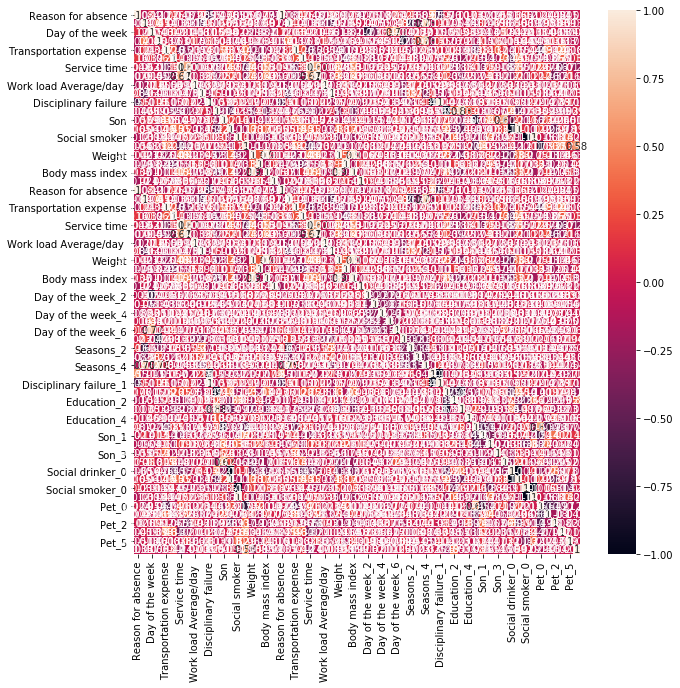

In [64]:
#Visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() , annot = True)

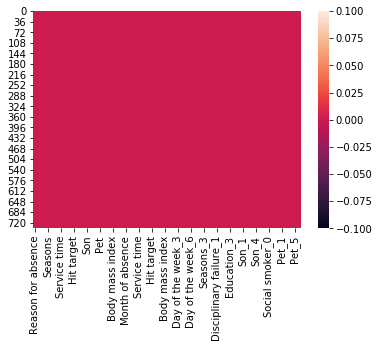

In [65]:
sns.heatmap(df.isnull())

# Model Selection for max Temp:
There are around 60+ predictive modeling algorithms that are available to choose from. We must have a good understanding of our data and the desired solution we are looking for, to narrow down our model selection. Here our goal is to predict the Absenteeism time in hours which can be increase exponetially. This scenario is a classic example of Regressions.

We are provided with 740 rows of the labeled dataset tagged with the output column “Absenteeism time in hours” to train our model. Whenever the dataset is labeled and output feature is known, we opt for the Supervised Learning Machine Learning technique. So, our use-case is a Supervised Learning plus Linear problem. Based on these criteria we can narrow down our choice of models to a few:

LogisticRegression()

SVC()

DecisionTreeClassifier()

KNeighborsClassifier()

# Identifying features:
Here we are dividing our data into a dependent feature that is object as y and independent features as x.

In [66]:
y = data['Absenteeism time in hours']
y.shape

(740,)

In [67]:
df.drop(categorical_val,axis=1,inplace=True)
x = df

# Splitting Data:
we split our data into a test set and train set using train_test_split() which helps to better train the model and test its performance. test_size=0.15 creates a test data set with 15% of the data we have and the remaining 85% percent will be our training set to train our model. This split function returns us a pair of the train set (x_train,y_train) and a pair of the test set (x_test,y_test).

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = .15 , random_state = 44)

In [82]:
model = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print('error')
    print('mae',mean_absolute_error(y_test,predm))
    print('mse',mean_squared_error(y_test,predm))
    print('rmse',np.sqrt(mean_squared_error(y_test,predm)))
    print('score',r2_score(y_test,predm))
    print('\n')

error
mae 1.634267121989052e-12
mse 4.17250271516242e-24
rmse 2.042670486192626e-12
score 1.0


error
mae 0.0
mse 0.0
rmse 0.0
score 1.0


error
mae 0.04468468468468463
mse 0.10747387387387387
rmse 0.3278320818252446
score 0.9988563429522944




# we can observe that Random Forest Regressor algorithem worked very well.
Accuracy score of both algorithems are as given:-

Accuracy score of Linear Regression is 100%

Accuracy score of DecisionTreeRegressor() is 100%

Accuracy score of RandomForestRegressor() is 100%

Hence we can say that out all algorithems RandomForestRegressor() is best for this problem till now however we will use cross validation to select best model.

In [83]:
lm =RandomForestRegressor()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)
pred= lm.predict(x_test)
print("predicted value",pred)
print("actual value",y_test)
print('error')
print('mae',mean_absolute_error(y_test,pred))
print('mse',mean_squared_error(y_test,pred))
print('rmse',np.sqrt(mean_squared_error(y_test,pred)))
print('score',r2_score(y_test,predm))

predicted value [ 1.    8.    3.    8.    1.    2.    4.    3.    2.    8.    1.    4.
  4.96  2.   79.6   8.    1.   24.    3.    8.    3.    4.    8.    8.
  3.    1.    2.    2.    2.    2.    8.    2.    1.    2.    4.96  0.
  8.    1.    8.    8.   16.   24.    8.    1.    0.    3.    2.    1.
  2.    4.    2.    8.    1.    8.    8.   24.    1.    8.    1.    1.
  4.    2.    3.    2.   40.08  2.    4.    1.   33.2   8.    4.    1.
  8.    8.    2.   16.    2.    8.    8.    8.    3.    3.    8.    2.
  3.    1.    2.    4.    8.    3.    2.    4.    3.    3.    8.    2.
  0.    4.   32.64  3.    8.    8.    1.    0.    2.    2.    3.    3.
  8.    2.    1.  ]
actual value 78     1
116    8
724    3
252    8
687    1
      ..
677    3
286    3
243    8
394    2
341    1
Name: Absenteeism time in hours, Length: 111, dtype: int64
error
mae 0.02162162162162169
mse 0.0181909909909911
rmse 0.134873981890471
score 0.9988563429522944


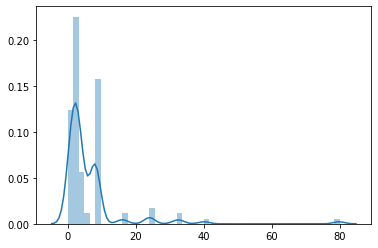

In [85]:
sns.distplot((y_test,pred),bins=50)

# Model Validation

In [86]:
clf = RandomForestRegressor()

scores = cross_val_score(clf,x,y,cv=5,scoring='r2')
scores.mean()

0.9883192163493634

# Save the model using Pickle

In [87]:
# Save the model using pickle
import pickle

filename = "pickleDTCfile.pkl"
pickle.dump(lm, open(filename, 'wb'))


# Conclusion

we achieved highest accuracy score of 98% by using RandomForestRegressor() which is good for any machine learning prediction model particularly for a linear regression problem. Finally! we successfully created a Regression Machine Learning prediction model using Python and its powerful libraries which predicts the absenteesim hrs.